<a href="https://colab.research.google.com/github/emon273273/Thesis/blob/Main/ml/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib.pyplot as plt

UsageError: Line magic function `%matplotlib.pyplot` not found.


# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/K-NEarest-Neighbor/master/Classified%20Data",index_col=0)
df.head(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


# Split the data frame into X and y

In [12]:
target_name='TARGET CLASS'
y=df[target_name]
X=df.drop(target_name,axis=1)

#Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
SSX=scaler.transform(X)
SSX

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(SSX,y,test_size=0.30)

# Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':pred}).round(0)
df

,Actual,Predicted
352,0,0
491,1,1
970,0,0
117,1,1
779,1,1
...,...,...
667,0,0
812,1,1
474,0,0
966,0,0


# Predictions and Evaluations

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [48]:
range_k = range(1, 25)
scores = {}

for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    knn_predict = classifier.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, knn_predict)

# Find the optimal k value
optimal_k = max(scores, key=scores.get)
print("Optimal k value:", optimal_k)

# Train KNN with the optimal k value
optimal_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_classifier.fit(X_train, y_train)

# Predict with the optimal classifier
optimal_knn_predict = optimal_classifier.predict(X_test)

# Print confusion matrix and classification report for the optimal classifier
result = metrics.confusion_matrix(y_test, optimal_knn_predict)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, optimal_knn_predict)
print("Classification Report:")
print(result1)

Optimal k value: 12
Confusion Matrix:
[[147   6]
 [  9 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       153
           1       0.96      0.94      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



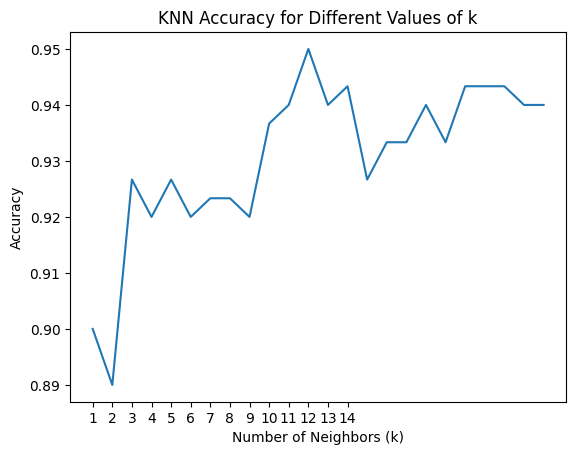

In [49]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.xticks(range(1, 15))
plt.show()

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=12)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [55]:
pred = knn.predict(X_test)

In [57]:

df=pd.DataFrame({'Actual':y_test,'Predicted':pred}).round(0)
df

,Actual,Predicted
352,0,0
491,1,1
970,0,0
117,1,1
779,1,1
...,...,...
667,0,0
812,1,1
474,0,0
966,0,0


In [58]:

from sklearn.metrics import mean_absolute_error
knn_predict_mean=mean_absolute_error(y_test,pred)
print(f"mean absolute error{knn_predict_mean}")

mean absolute error0.05
